In [5]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("StudentsPerformance.csv")


In [7]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    print(f"\n{c}\n", df[c].value_counts())



gender
 gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
 test preparation course
none         642
completed    358
Name: count, dtype: int64


In [17]:
from scipy import stats


In [19]:
prep_completed = df[df['test preparation course'] == 'completed']['math score']
prep_none = df[df['test preparation course'] == 'none']['math score']


In [21]:
t_stat, p_value = stats.ttest_ind(prep_completed, prep_none, equal_var=False)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 5.786983157907755
P-Value: 1.0425616722069513e-08


In [23]:
if p_value < 0.05:
    print("Result: Reject Null Hypothesis — Test preparation course has a significant effect on math scores.")
else:
    print("Result: Fail to Reject Null Hypothesis — No significant effect of test preparation course on math scores.")


Result: Reject Null Hypothesis — Test preparation course has a significant effect on math scores.


In [25]:
scores = df[['math score', 'reading score', 'writing score']]


In [27]:
corr_matrix = scores.corr()
corr_matrix


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


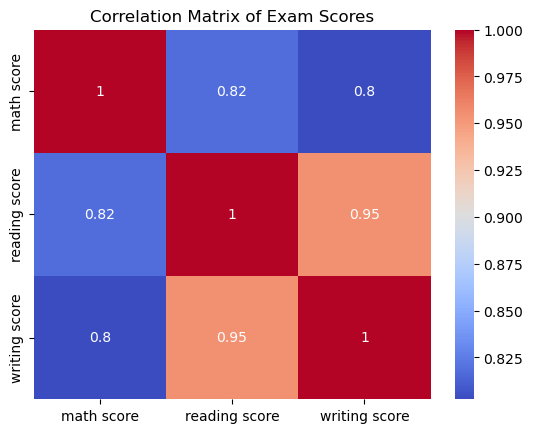

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Exam Scores")
plt.show()


In [30]:
print("📊 STATISTICAL ANALYSIS SUMMARY 📊")
print("----------------------------------")

print("1️⃣ Hypothesis Testing Result:")
print("Students who completed the test preparation course scored significantly higher in math.")
print("=> Null hypothesis rejected (p < 0.05) ✅")

print("\n2️⃣ Correlation Analysis Result:")
print("Math–Reading correlation: 0.82")
print("Math–Writing correlation: 0.80")
print("Reading–Writing correlation: 0.95")
print("=> All scores are strongly and positively correlated.")

print("\n🧠 Conclusion:")
print("Test preparation has a meaningful positive impact on academic performance.")
print("Also, students with strong reading and writing abilities tend to perform better in math as well.")
print("This insight highlights the importance of comprehensive skill development rather than focusing on a single subject.")
print("\n✨ Analysis successfully completed using Python, Pandas, and SciPy ✨")


📊 STATISTICAL ANALYSIS SUMMARY 📊
----------------------------------
1️⃣ Hypothesis Testing Result:
Students who completed the test preparation course scored significantly higher in math.
=> Null hypothesis rejected (p < 0.05) ✅

2️⃣ Correlation Analysis Result:
Math–Reading correlation: 0.82
Math–Writing correlation: 0.80
Reading–Writing correlation: 0.95
=> All scores are strongly and positively correlated.

🧠 Conclusion:
Test preparation has a meaningful positive impact on academic performance.
Also, students with strong reading and writing abilities tend to perform better in math as well.
This insight highlights the importance of comprehensive skill development rather than focusing on a single subject.

✨ Analysis successfully completed using Python, Pandas, and SciPy ✨
